In [6]:
"""
Author:   Chuck Stewart
Course:   CSCI 4270 and 6270
Lecture:  02
File:     ex2_combine_images.py

Purpose:  Demonstrate linearly combining two images using both OpenCV
functions and NumPy functions.  Also demonstrate output of multiple
images in a single MatPlotLib figure. Finally, we've switched here to using
a Jupyter notebook.
"""

import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import random
import pathlib

In [7]:
"""
Set the parameters:  where to find images and the value of the blending weight.
"""
test_image_dir = "/Users/stewart/Dropbox/cv_2024_spring/test_images/kenya"
blend_wgt = 0.3

In [8]:
"""
Save the current working directory and switch into the test directory
"""
prev_wd = os.getcwd()
os.chdir(test_image_dir)

"""
Through random sampling of indices, get two images that are the same size.
"""
img_extensions = ['.jpg', '.jpeg', '.png']
img_list = os.listdir('./')
img_list = [name for name in img_list if pathlib.Path(name).suffix.lower() in img_extensions]
random.seed()
found = False
while not found:
    ii = random.randint(0, len(img_list) - 1)
    jj = random.randint(0, len(img_list) - 1)
    if ii == jj:
        continue
    print("ii = %d, jj = %d" % (ii, jj))
    img_i = cv2.imread(img_list[ii])
    img_j = cv2.imread(img_list[jj])
    print(img_i.shape)
    print(img_j.shape)
    found = img_i.shape == img_j.shape

# Go back to previous working directory
os.chdir(prev_wd)

ii = 14, jj = 17
(4000, 6000, 3)
(3391, 4699, 3)
ii = 16, jj = 7
(3287, 4619, 3)
(6000, 4000, 3)
ii = 18, jj = 24
(4000, 6000, 3)
(2600, 3733, 3)
ii = 21, jj = 18
(6000, 4000, 3)
(4000, 6000, 3)
ii = 0, jj = 22
(4000, 6000, 3)
(3501, 2716, 3)
ii = 21, jj = 8
(6000, 4000, 3)
(2510, 3963, 3)
ii = 20, jj = 15
(4000, 6000, 3)
(4000, 6000, 3)


In [9]:
"""
Weighted linear combination using NumPy operations
"""
img_np = (1 - blend_wgt) * img_i + blend_wgt * img_j
print('\nThe data type after use of NumPy operations:', img_np.dtype)
img_np = img_np.astype(img_i.dtype)    # convert back to uint8
print('Converting back to the original type:', img_np.dtype)

"""
Weighted linear combination using OpenCV operations.
"""
img_cv = cv2.addWeighted(img_i, blend_wgt, img_j, 1-blend_wgt, 0)
print('\nThe data type after use of OpenCV function:', img_cv.dtype)

"""
Reverse the images (BGR -> RGB) for PyPlot display.
In a later example we will see how to do this using
OpenCV's cvtColor function.
"""
img_i = img_i[:, :, ::-1]
img_j = img_j[:, :, ::-1]
img_np = img_np[:, :, ::-1]
img_cv = img_cv[:, :, ::-1]


The data type after use of NumPy operations: float64
Converting back to the original type: uint8

The data type after use of OpenCV function: uint8


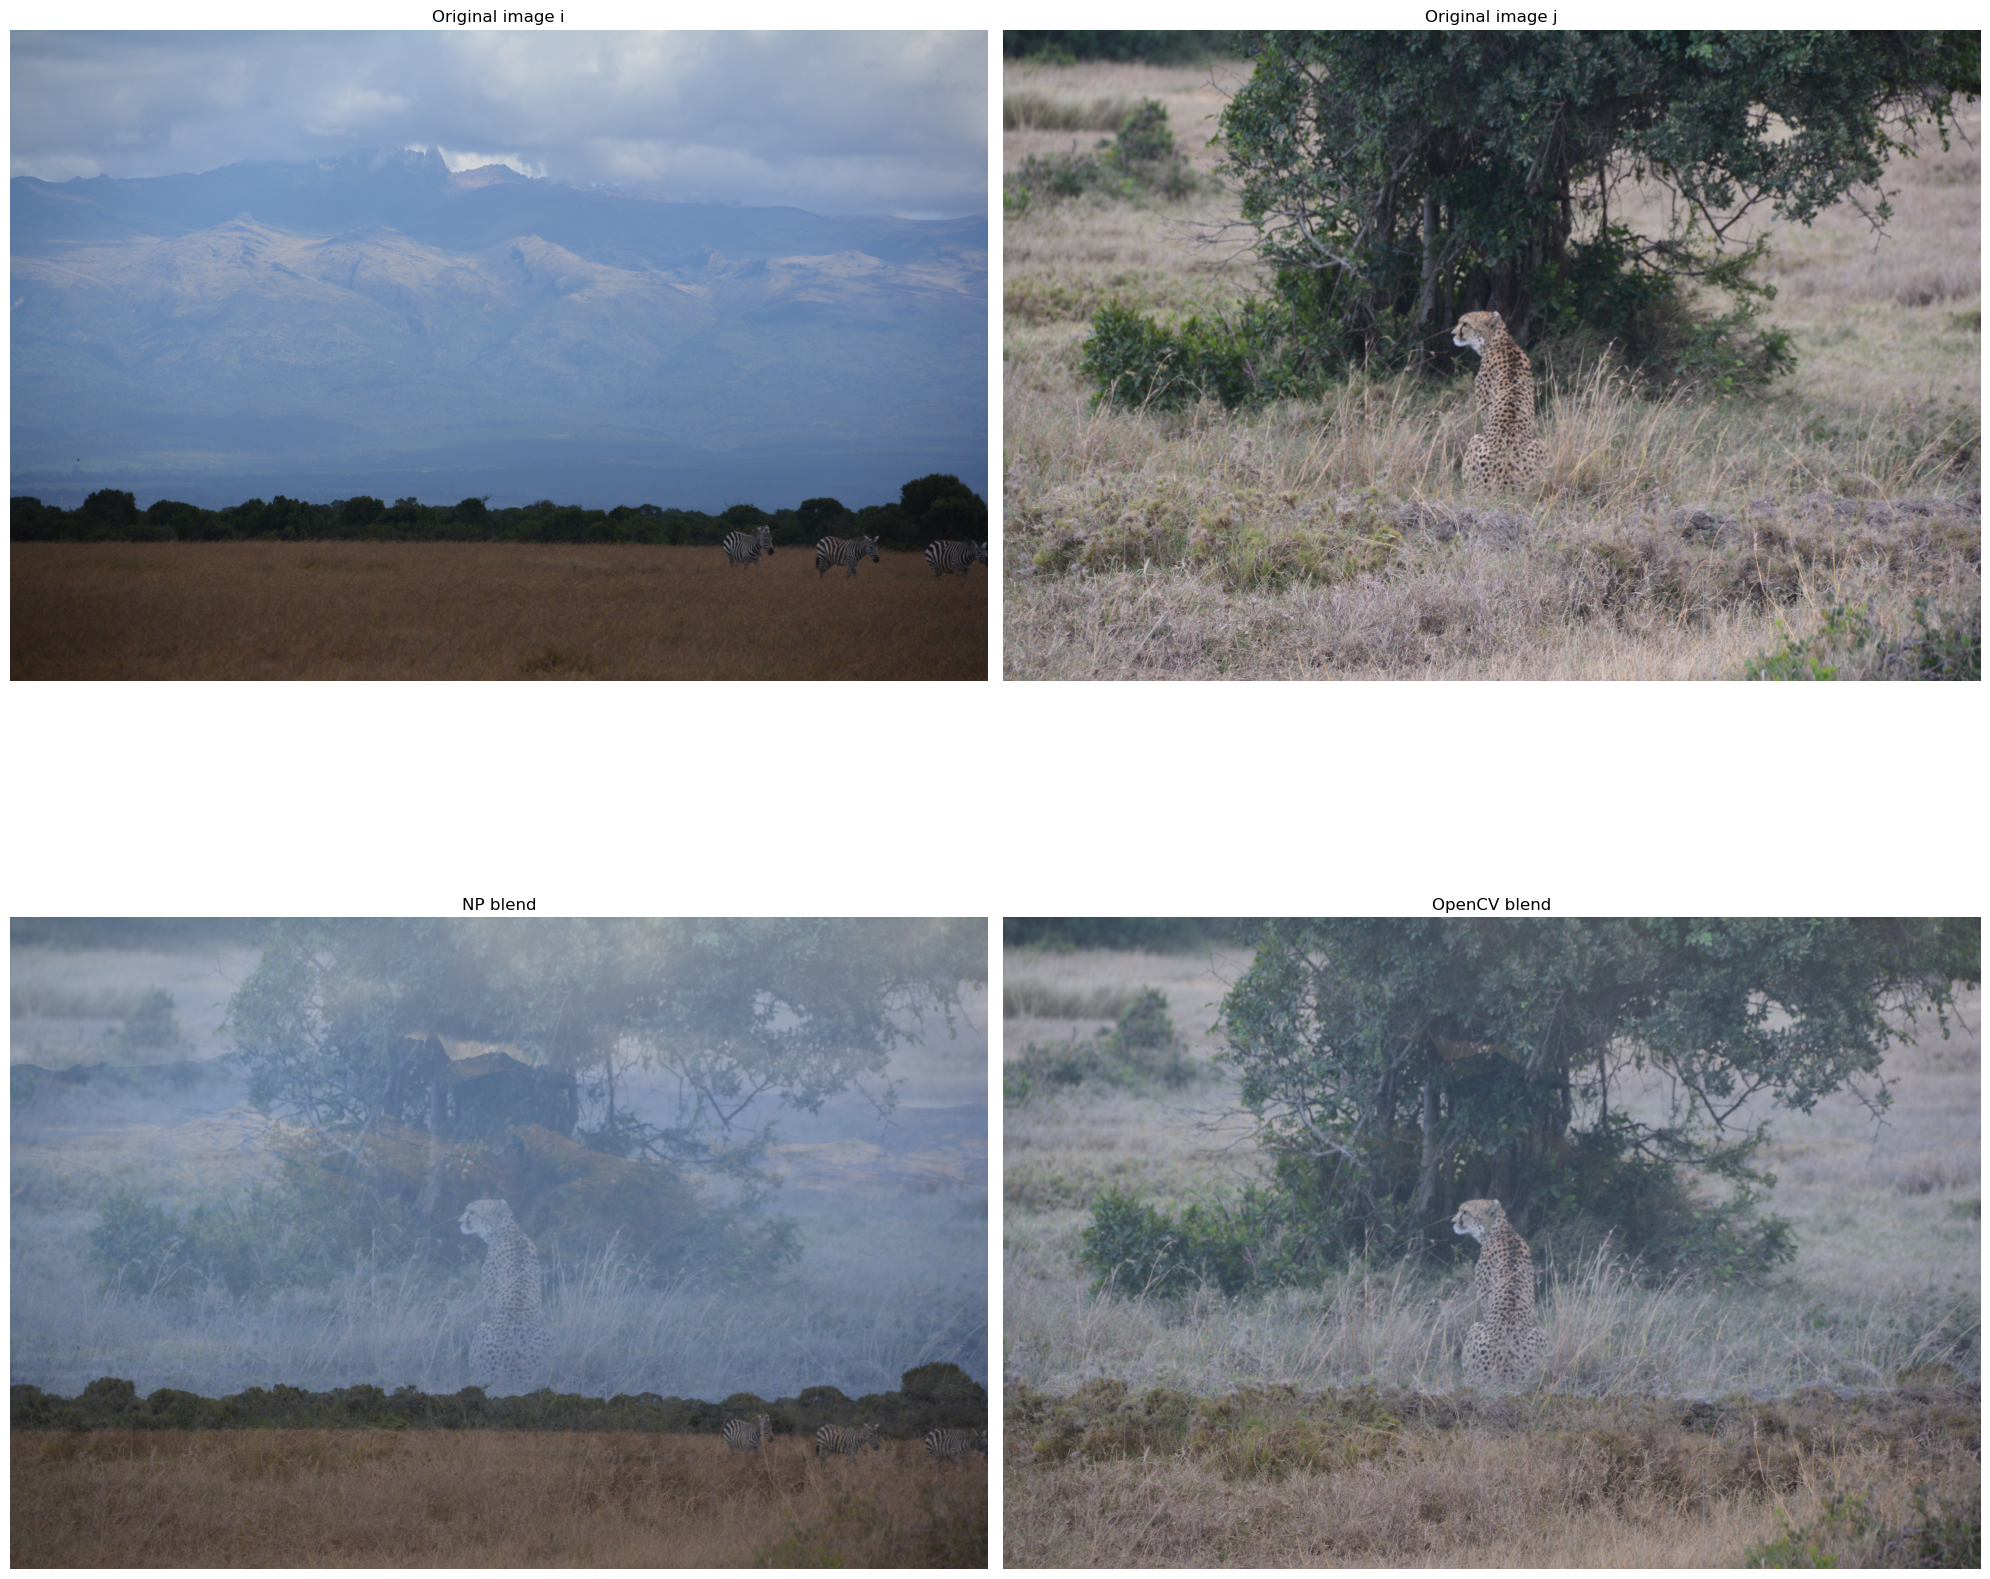

In [10]:
"""
The display shows a 2x2 grid giving the original images, and the
blended images. This illustrates some of the power of pyplot.
"""

fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes[0, 0].imshow(img_i)
axes[0, 0].axis('off')
axes[0, 0].set_title('Original image i')

axes[0, 1].imshow(img_j)
axes[0, 1].axis('off')
axes[0, 1].set_title('Original image j')

axes[1, 0].imshow(img_np)
axes[1, 0].axis('off')
axes[1, 0].set_title('NP blend')

axes[1, 1].imshow(img_cv)
axes[1, 1].axis('off')
axes[1, 1].set_title('OpenCV blend')

plt.tight_layout()
plt.show()

